#Linear Regression with MLLib

In [0]:
# Data processing
import pandas as pd
# Create synthetic dataset
from sklearn.datasets import make_regression
# Modeling packages
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.feature import MinMaxScaler

In [0]:
# Create a synthetic dataset w make_regression
X, y = make_regression(n_samples=1000000, n_features=3, noise=0.4, bias=3, random_state=42)
# Convert the data from numpy array to a pandas dataframe
pdf = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1],'feature3':X[:,2], 'dependent_variable': y})
# Convert pandas dataframe to spark dataframe
sdf = spark.createDataFrame(pdf)
# Check data summary statistics
display(sdf.summary())

summary feature1 feature2 feature3 dependent_variable count 1000000 1000000 1000000 1000000 mean -2.449823996077243E-4 -0.0010132624907900145 -3.967827239890136E-4 2.9225898606743517 stddev 1.0004290640831686 1.0005237692610418 1.0003090010225077 103.29180776435476 min -4.644418774315494 -4.98014593114449 -4.829436008511157 -510.4328855383295 25% -0.6749188382091308 -0.6759671566957388 -0.6752508786543981 -66.95254324505481 50% 5.962244480835583E-4 -4.930309109369278E-4 -1.589231514889746E-4 2.9240994837290923 75% 0.6745730419256761 0.6747339831104918 0.6730732457270736 72.86935762429238 max 5.032374193499152 4.678949100376724 4.479084251025757 508.8597127073729

In [0]:
import seaborn as sns

<AxesSubplot:xlabel='feature1', ylabel='Density'>

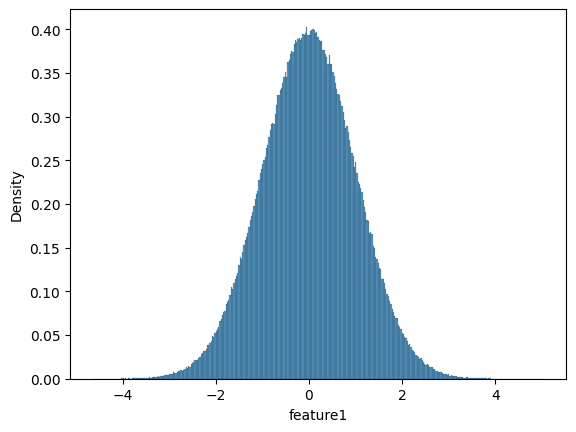

In [0]:
sns.histplot(data = pdf, x = 'feature1', stat = 'density')

<AxesSubplot:xlabel='feature2', ylabel='Density'>

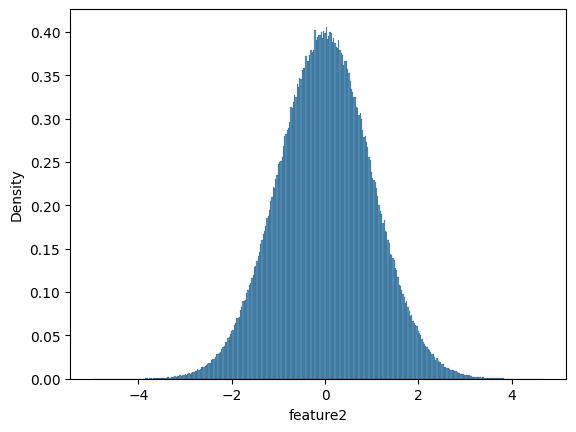

In [0]:
sns.histplot(data = pdf, x = 'feature2', stat = 'density')

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

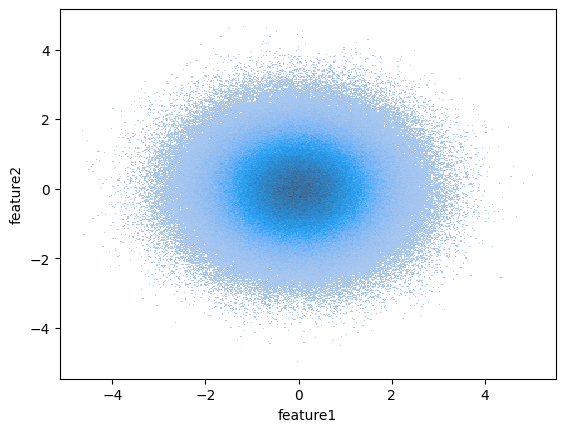

In [0]:
sns.histplot(data = pdf, x = 'feature1', y = 'feature2', stat = 'density')

In [0]:
# Train test split
trainDF, testDF = sdf.randomSplit([.8, .2], seed=42)

In [0]:
# Linear regression expect a vector input
vecAssembler = VectorAssembler(inputCols=['feature1', 'feature2', 'feature3'], outputCol="features")
vecTrainDF = vecAssembler.transform(trainDF)
# Take a look at the data
display(vecTrainDF)

feature1 feature2 feature3 dependent_variable features -4.1577338773991315 -0.7219988725181353 -1.2345795495474055 -436.271263163846 Map(vectorType -> dense, length -> 3, values -> List(-4.1577338773991315, -0.7219988725181353, -1.2345795495474055)) -3.9862078553865072 -0.9806549294443195 0.1818869884036068 -380.97312481858296 Map(vectorType -> dense, length -> 3, values -> List(-3.9862078553865072, -0.9806549294443195, 0.1818869884036068)) -3.94902687430091 -0.5387944679703897 0.02640378060841553 -365.72262674002855 Map(vectorType -> dense, length -> 3, values -> List(-3.94902687430091, -0.5387944679703897, 0.02640378060841553)) -3.9187684649740793 0.6138715648421005 0.0969808326953741 -312.54387294777257 Map(vectorType -> dense, length -> 3, values -> List(-3.9187684649740793, 0.6138715648421005, 0.0969808326953741)) -3.83722486227541 0.39661772398383166 0.6464814764530813 -294.4857225287349 Map(vectorType -> dense, length -> 3, values -> List(-3.83722486227541, 0.39661772398383166, 0.6464814764530813)) -3.783913072797246 2.2172223720348225 0.0687333219735857 -235.48857701096483 Map(vectorType -> dense, length -> 3, values -> List(-3.783913072797246, 2.2172223720348225, 0.0687333219735857)) -3.7590747524610344 -1.529407228842336 0.7820409612337917 -361.92925437895525 Map(vectorType -> dense, length -> 3, values -> List(-3.7590747524610344, -1.529407228842336, 0.7820409612337917)) -3.7175878210502082 -0.7353760646712015 -1.2934216151953557 -399.08618484537493 Map(vectorType -> dense, length -> 3, values -> List(-3.7175878210502082, -0.7353760646712015, -1.2934216151953557)) -3.7011053323180247 -0.9901976976408127 -0.6943250200355366 -386.85591288076074 Map(vectorType -> dense, length -> 3, values -> List(-3.7011053323180247, -0.9901976976408127, -0.6943250200355366)) -3.676900546498228 0.12267793920517263 1.3648359602542623 -266.0607504519982 Map(vectorType -> dense, length -> 3, values -> List(-3.676900546498228, 0.12267793920517263, 1.3648359602542623)) -3.655924978928437 0.3377443316976673 -1.020819243704315 -340.68986500344977 Map(vectorType -> dense, length -> 3, values -> List(-3.655924978928437, 0.3377443316976673, -1.020819243704315)) -3.6371254405063613 -0.4044385916015208 1.4795788642185208 -279.8689753900255 Map(vectorType -> dense, length -> 3, values -> List(-3.6371254405063613, -0.4044385916015208, 1.4795788642185208)) -3.6315388139245934 -0.20563814231104197 0.3474786580484292 -312.3327773869967 Map(vectorType -> dense, length -> 3, values -> List(-3.6315388139245934, -0.20563814231104197, 0.3474786580484292)) -3.6255610193916517 1.1658638696468535 -0.804584785510869 -296.33397671794864 Map(vectorType -> dense, length -> 3, values -> List(-3.6255610193916517, 1.1658638696468535, -0.804584785510869)) -3.6224729958978745 1.3213176290528266 -0.6529390594366598 -284.75058746451396 Map(vectorType -> dense, length -> 3, values -> List(-3.6224729958978745, 1.3213176290528266, -0.6529390594366598)) -3.597534018204867 0.17759164028959815 -0.6367535335992768 -327.99427594393654 Map(vectorType -> dense, length -> 3, values -> List(-3.597534018204867, 0.17759164028959815, -0.6367535335992768)) -3.5893552203380157 -1.3079812079541218 0.2531269763902953 -357.3473164715503 Map(vectorType -> dense, length -> 3, values -> List(-3.5893552203380157, -1.3079812079541218, 0.2531269763902953)) -3.5840207830671935 -1.5439723399934782 -0.6624976726200759 -398.5540017465125 Map(vectorType -> dense, length -> 3, values -> List(-3.5840207830671935, -1.5439723399934782, -0.6624976726200759)) -3.557223593032596 1.586885169519432 -1.1470038677854244 -285.2095657762691 Map(vectorType -> dense, length -> 3, values -> List(-3.557223593032596, 1.586885169519432, -1.1470038677854244)) -3.556585531410037 0.2123671257824892 1.4018307495857516 -250.51950797571476 Map(vectorType -> dense, length -> 3, values -> List(-3.556585531410037, 0.2123671257824892, 1.4018307495857516)) -3.5476629248313647 -0.9616158509444778 1.2066560042970356 -306.0331675065

In [0]:
scaler = MinMaxScaler(min = -1, max = 1)
scaler.setInputCol("features").setOutputCol("scaled_features")

MinMaxScaler_9ea4cb2c127f

In [0]:
scaled_df = scaler.fit(vecTrainDF).transform(vecTrainDF)

In [0]:
display(scaled_df.limit(10))

feature1 feature2 feature3 dependent_variable features scaled_features -4.1577338773991315 -0.7219988725181353 -1.2345795495474055 -436.271263163846 Map(vectorType -> dense, length -> 3, values -> List(-4.1577338773991315, -0.7219988725181353, -1.2345795495474055)) Map(vectorType -> dense, length -> 3, values -> List(-0.8994119439084635, -0.1183134559230572, -0.22762021057413684)) -3.9862078553865072 -0.9806549294443195 0.1818869884036068 -380.97312481858296 Map(vectorType -> dense, length -> 3, values -> List(-3.9862078553865072, -0.9806549294443195, 0.1818869884036068)) Map(vectorType -> dense, length -> 3, values -> List(-0.8639609380673494, -0.17187045191120998, 0.07671742816061067)) -3.94902687430091 -0.5387944679703897 0.02640378060841553 -365.72262674002855 Map(vectorType -> dense, length -> 3, values -> List(-3.94902687430091, -0.5387944679703897, 0.02640378060841553)) Map(vectorType -> dense, length -> 3, values -> List(-0.8562763712466552, -0.08037938364198294, 0.043310784900444155)) -3.9187684649740793 0.6138715648421005 0.0969808326953741 -312.54387294777257 Map(vectorType -> dense, length -> 3, values -> List(-3.9187684649740793, 0.6138715648421005, 0.0969808326953741)) Map(vectorType -> dense, length -> 3, values -> List(-0.8500225618642553, 0.15829018717203502, 0.05847475298971183)) -3.83722486227541 0.39661772398383166 0.6464814764530813 -294.4857225287349 Map(vectorType -> dense, length -> 3, values -> List(-3.83722486227541, 0.39661772398383166, 0.6464814764530813)) Map(vectorType -> dense, length -> 3, values -> List(-0.8331691264399601, 0.1133058816756527, 0.17653876927516232)) -3.783913072797246 2.2172223720348225 0.0687333219735857 -235.48857701096483 Map(vectorType -> dense, length -> 3, values -> List(-3.783913072797246, 2.2172223720348225, 0.0687333219735857)) Map(vectorType -> dense, length -> 3, values -> List(-0.8221506434248783, 0.4902779773242991, 0.05240557981627458)) -3.7590747524610344 -1.529407228842336 0.7820409612337917 -361.92925437895525 Map(vectorType -> dense, length -> 3, values -> List(-3.7590747524610344, -1.529407228842336, 0.7820409612337917)) Map(vectorType -> dense, length -> 3, values -> List(-0.8170170582755785, -0.2854944089397379, 0.20566466275792616)) -3.7175878210502082 -0.7353760646712015 -1.2934216151953557 -399.08618484537493 Map(vectorType -> dense, length -> 3, values -> List(-3.7175878210502082, -0.7353760646712015, -1.2934216151953557)) Map(vectorType -> dense, length -> 3, values -> List(-0.8084425374505875, -0.12108332041023973, -0.24026283561170148)) -3.7011053323180247 -0.9901976976408127 -0.6943250200355366 -386.85591288076074 Map(vectorType -> dense, length -> 3, values -> List(-3.7011053323180247, -0.9901976976408127, -0.6943250200355366)) Map(vectorType -> dense, length -> 3, values -> List(-0.8050359359480019, -0.1738463654238842, -0.11154278592474454)) -3.676900546498228 0.12267793920517263 1.3648359602542623 -266.0607504519982 Map(vectorType -> dense, length -> 3, values -> List(-3.676900546498228, 0.12267793920517263, 1.3648359602542623)) Map(vectorType -> dense, length -> 3, values -> List(-0.8000332897406679, 0.05658425632986375, 0.33088220169455274))

In [0]:
# Create linear regression
lr = LinearRegression(featuresCol="scaled_features", labelCol="dependent_variable")
# Fit the linear regresssion model
lrModel = lr.fit(scaled_df)
# Print model intercept and coefficients
print(f'The intercept of the model is {lrModel.intercept:.2f} and the coefficients of the model are {lrModel.coefficients[0]:.2f} and {lrModel.coefficients[1]:.2f}')

The intercept of the model is 7.60 and the coefficients of the model are 425.10 and 198.37


In [0]:
# Create pipeline
stages = [vecAssembler, scaler, lr]
pipeline = Pipeline(stages=stages)
# Fit the pipeline model
pipelineModel = pipeline.fit(trainDF)

In [0]:
# Make predictions on testing dataset
predDF = pipelineModel.transform(testDF)
# Take a look at the output
display(predDF.select("scaled_features", "dependent_variable", "prediction"))

scaled_features dependent_variable prediction Map(vectorType -> dense, length -> 3, values -> List(-0.8635708761930647, -0.2211315193699307, -0.19457488834490233)) -435.51595331828713 -435.73502430418 Map(vectorType -> dense, length -> 3, values -> List(-0.8243671559858087, 0.21812685387982933, -0.03673318068319087)) -305.1066815650081 -305.67991316553633 Map(vectorType -> dense, length -> 3, values -> List(-0.8184802544601507, 0.05172384560027177, 0.1302165225395866)) -308.9203069126599 -308.4189953640324 Map(vectorType -> dense, length -> 3, values -> List(-0.7963373267253284, -0.1369783933982559, 0.17092698838756037)) -330.1233766702016 -329.66805768258536 Map(vectorType -> dense, length -> 3, values -> List(-0.7869801978915644, -0.3855752954453294, 0.11382289084916186)) -385.2854248243263 -384.50286270204657 Map(vectorType -> dense, length -> 3, values -> List(-0.7789286577235821, -0.11822731008934961, -0.15374885287663242)) -372.2746243575888 -372.5499821909593 Map(vectorType -> dense, length -> 3, values -> List(-0.7689829757943107, 0.4866548558395003, 0.06496921702171554)) -211.51163889460926 -211.95202223965552 Map(vectorType -> dense, length -> 3, values -> List(-0.748502695757268, -0.015077775404040206, 0.36379486010243234)) -253.28730564513606 -253.07302769982803 Map(vectorType -> dense, length -> 3, values -> List(-0.7344178662867307, -0.16855958752793188, 0.39745686909371725)) -272.0446356926711 -271.9331806348938 Map(vectorType -> dense, length -> 3, values -> List(-0.7340260909884355, 0.31649145645433574, 0.46128096193626655)) -165.29696666462698 -164.93058091789672 Map(vectorType -> dense, length -> 3, values -> List(-0.7273301167066195, 0.17019480111346375, 0.18913296208928654)) -236.56955134629155 -236.3705362791562 Map(vectorType -> dense, length -> 3, values -> List(-0.7259325642809411, -0.07388690016689026, 0.14878530586412153)) -290.4241662171391 -290.9062293452789 Map(vectorType -> dense, length -> 3, values -> List(-0.7241978884129248, -0.13942643677543276, 0.007762994528867306)) -326.83527850059244 -326.6256869071219 Map(vectorType -> dense, length -> 3, values -> List(-0.7212180525439504, 0.2860538180352583, 0.3949171137966019)) -176.72593641255997 -176.56189668456202 Map(vectorType -> dense, length -> 3, values -> List(-0.7110527243117833, 0.01905274835232973, 0.05915811092140166)) -280.5048691121845 -281.05154698715523 Map(vectorType -> dense, length -> 3, values -> List(-0.7056031807422022, -0.13589882607192327, 0.032719616469076396)) -313.4531908011437 -313.8703837053118 Map(vectorType -> dense, length -> 3, values -> List(-0.7003702081468619, 0.5262778529125707, -0.10047923501357292)) -202.9336905736889 -202.4430917159489 Map(vectorType -> dense, length -> 3, values -> List(-0.6835787771649461, 0.14187966042527544, 0.11581073910205197)) -235.47497294649403 -235.5842016453387 Map(vectorType -> dense, length -> 3, values -> List(-0.6780591895845183, -0.16778314563153485, 0.17177995774748256)) -285.492638372697 -285.3570685776993 Map(vectorType -> dense, length -> 3, values -> List(-0.676896328876267, 0.3061591593316453, 0.4618586817922705)) -142.46560576275618 -142.59832536188614 Map(vectorType -> dense, length -> 3, values -> List(-0.6765494859170216, 0.2005762595813143, 0.13727125823774133)) -217.12057350542946 -217.38286541645337 Map(vectorType -> dense, length -> 3, values -> List(-0.6761394842344931, 0.07845211536231633, 0.13556876921756955)) -241.5857920015919 -241.7177297695687 Map(vectorType -> dense, length -> 3, values -> List(-0.6714734157367988, 0.20445057842666814, -0.2175459311720589)) -272.97110974270794 -273.4717838792696 Map(vectorType -> dense, length -> 3, values -> List(-0.6702230306450685, 0.2116864603848425, 0.16525673786126704)) -208.25075705678475 -207.8348337465046 Map(vectorType -> dense, length -> 3, values -> List(-0.6634879401462321, 0.14763507740132398, -0.17060961609737535)) -273.63197839927244 -273.54103310568854 Map(vectorType -> dense, length -> 3, values -> List(-

In [0]:
# Create regression evaluator
regressionEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol="dependent_variable", metricName="rmse")
# RMSE
rmse = regressionEvaluator.evaluate(predDF)
print(f"The RMSE for the linear regression model is {rmse:0.2f}")
# MSE
mse = regressionEvaluator.setMetricName("mse").evaluate(predDF)
print(f"The MSE for the linear regression model is {mse:0.2f}")
# R2
r2 = regressionEvaluator.setMetricName("r2").evaluate(predDF)
print(f"The R2 for the linear regression model is {r2:0.2f}")
# MAE
mae = regressionEvaluator.setMetricName("mae").evaluate(predDF)
print(f"The MAE for the linear regression model is {mae:0.2f}")

The RMSE for the linear regression model is 0.40
The MSE for the linear regression model is 0.16
The R2 for the linear regression model is 1.00
The MAE for the linear regression model is 0.32


<AxesSubplot:xlabel='feature1', ylabel='dependent_variable'>

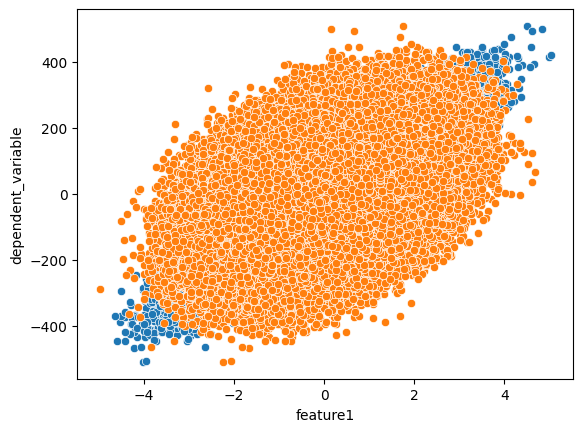

In [0]:
sns.scatterplot(data = pdf, x = "feature1", y = "dependent_variable")